<a href="https://colab.research.google.com/github/eddychetz/Data-Analytics-and-Visualization-Capstone-Project-with-Python/blob/main/DataVisualization_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab: Histograms**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-04-22 02:57:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  11.2MB/s    in 3.1s    

2021-04-22 02:57:30 (11.2 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("m4_survey_data.sqlite")
cur = conn.cursor()
QUERY = """
SELECT * FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
print(df.head())

   index  Respondent  ...           SurveyLength                  SurveyEase
0      0           4  ...  Appropriate in length                        Easy
1      1           9  ...  Appropriate in length  Neither easy nor difficult
2      2          13  ...  Appropriate in length                        Easy
3      3          16  ...  Appropriate in length  Neither easy nor difficult
4      4          17  ...  Appropriate in length                        Easy

[5 rows x 63 columns]


Import pandas module.


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df1 = pd.read_sql_query(QUERY,conn)
df1.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


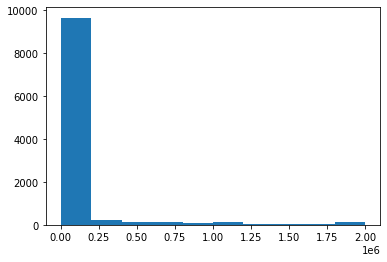

In [ ]:
# your code goes here
plt.hist(df['ConvertedComp'])
plt.show()

### Box Plots


Plot a box plot of `Age.`


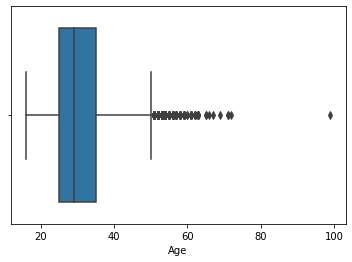

In [ ]:
# your code goes here
import seaborn as sns
sns.boxplot(df.Age) 
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


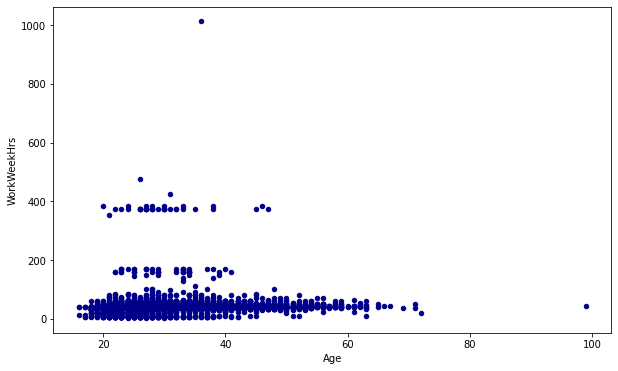

In [ ]:
# your code goes here
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `Age`, use `Age` column as bubble size.

##### Hint: Use plotly.express to create a bubble chart


In [ ]:
import plotly.express as px
#fig = px.scatter(df, x="WorkWeekHrs", y="Age",
#         size="Age", log_x=True, size_max=10)
#fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 Country that respondents filled the survey . Display percentages of each database on the pie chart. 


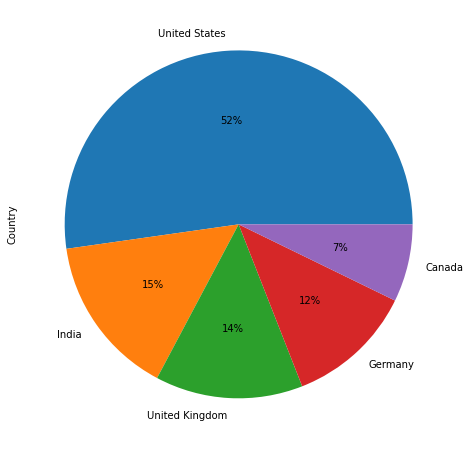

In [ ]:
# your code goes here
df_pie = df['Country'].value_counts()
df_pie=df_pie.head(5)
df_pie.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%')
plt.show()

## Visualizing comparison of data


### Line Chart


Draw distribution plot for ConverteComp and plot the median

##### Hint: Use seaborn library for distribution plot


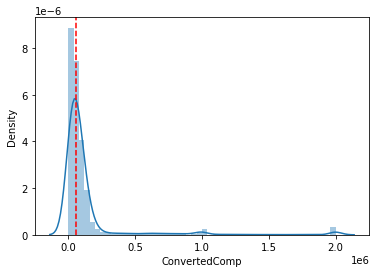

In [ ]:
# your code goes here
import seaborn as sns
median=df.ConvertedComp.median() # compute the median ConvertedComp (salary)
sns.distplot(df.ConvertedComp) # plotting the density plot of ConvertedComp
plt.axvline(median, color='r', linestyle='--') # drawing the vertical line with dashed red colored style
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


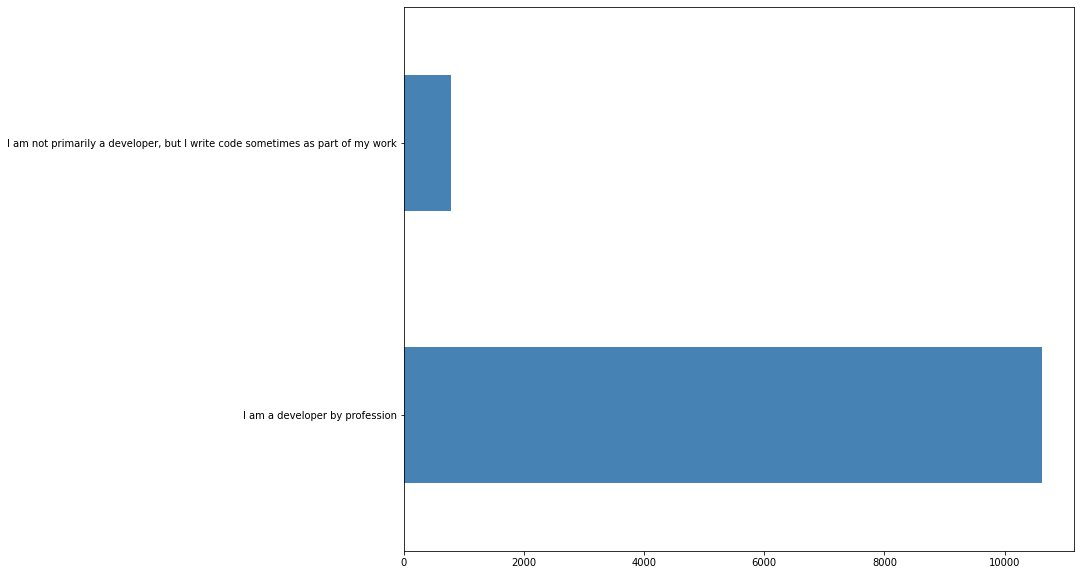

In [ ]:
# your code goes here
df_mbranch = df.MainBranch.value_counts()
df_mbranch
df_mbranch.plot(kind='barh', figsize=(12, 10), color='steelblue')
plt.show()


Close the database connection.


In [ ]:
conn.close()